<a href="https://colab.research.google.com/github/dilia-w/Visao-Computacional/blob/main/16_Usando_filtro_passa_alta_em_uma_fotografia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

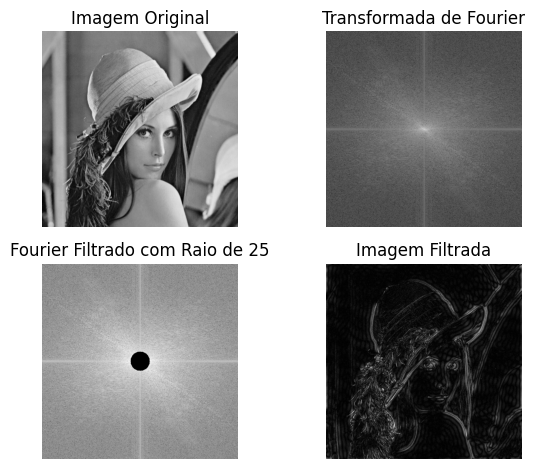

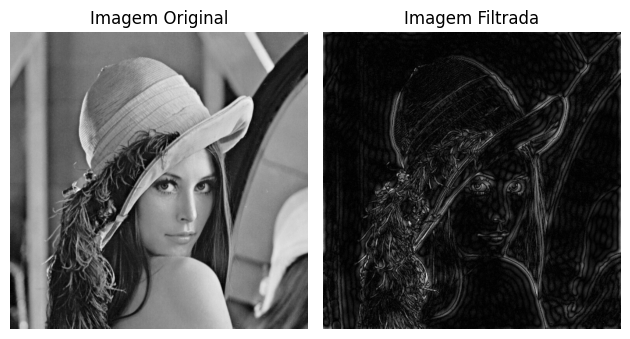

In [1]:
import numpy as np
import urllib.request
import cv2
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift, ifft2

# Fazendo o download da imagem de Lena
image_url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
urllib.request.urlretrieve(image_url, 'lena_gray.png')
image = cv2.imread('lena_gray.png', cv2.IMREAD_GRAYSCALE)

# Calcular a transformada de Fourier 2D da imagem
transformada = fftshift(fft2(image))

# Criando o filtro para a imagem
filter_size = image.shape
center = (filter_size[0] // 2, filter_size[1] // 2)
radius = 25
filter = np.zeros(filter_size)
filter = cv2.circle(filter, center, radius, 1, -1)
filter_bool = filter.copy().astype(bool)

# Filtrando a imagem
transformada_filtrada = transformada * ~(filter_bool)
image_inverse = ifft2(transformada_filtrada)
image_inverse = np.abs(image_inverse)

# Apresentando o resultado da filtragem
plt.figure()

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(np.log(1 + np.abs(transformada)), cmap='gray')
plt.title('Transformada de Fourier')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(np.log(1 + np.abs(transformada_filtrada)), cmap='gray')
plt.title('Fourier Filtrado com Raio de ' + str(radius))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(image_inverse, cmap='gray')
plt.title('Imagem Filtrada')
plt.axis('off')

plt.tight_layout()
plt.show()

plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_inverse, cmap='gray')
plt.title('Imagem Filtrada')
plt.axis('off')

plt.tight_layout()
plt.show()
